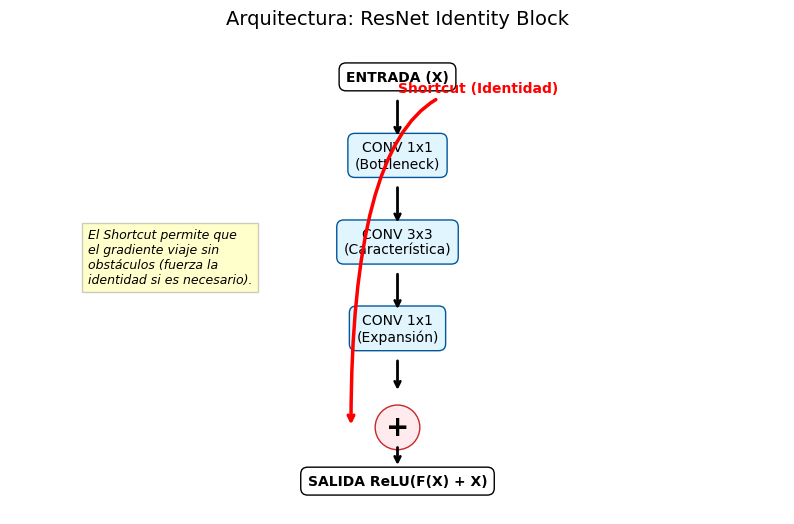

In [3]:
import matplotlib.pyplot as plt

def plot_resnet_identity_block():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.axis('off')

    # Estilo de cajas
    box = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black')
    conv_box = dict(boxstyle='round,pad=0.5', facecolor='#e1f5fe', edgecolor='#01579b')
    add_box = dict(boxstyle='circle', facecolor='#ffebee', edgecolor='#c62828')

    # Nodos principales
    ax.text(5, 7.5, "ENTRADA (X)", ha='center', weight='bold', bbox=box)
    
    # --- CAMINO PRINCIPAL (Main Path) ---
    ax.text(5, 6, "CONV 1x1\n(Bottleneck)", ha='center', bbox=conv_box)
    ax.text(5, 4.5, "CONV 3x3\n(Característica)", ha='center', bbox=conv_box)
    ax.text(5, 3, "CONV 1x1\n(Expansión)", ha='center', bbox=conv_box)
    
    # --- SUMA Y SALIDA ---
    ax.text(5, 1.5, "+", ha='center', va='center', fontsize=20, weight='bold', bbox=add_box)
    ax.text(5, 0.5, "SALIDA ReLU(F(X) + X)", ha='center', weight='bold', bbox=box)

    # Flechas Camino Principal
    ax.annotate('', xy=(5, 6.5), xytext=(5, 7.2), arrowprops=dict(arrowstyle='->', lw=2))
    ax.annotate('', xy=(5, 5), xytext=(5, 5.7), arrowprops=dict(arrowstyle='->', lw=2))
    ax.annotate('', xy=(5, 3.5), xytext=(5, 4.2), arrowprops=dict(arrowstyle='->', lw=2))
    ax.annotate('', xy=(5, 2.1), xytext=(5, 2.7), arrowprops=dict(arrowstyle='->', lw=2))
    ax.annotate('', xy=(5, 0.8), xytext=(5, 1.2), arrowprops=dict(arrowstyle='->', lw=2))

    # --- CAMINO DE IDENTIDAD (Shortcut / Skip Connection) ---
    # Dibujar la curva del shortcut
    connection = "angle3,angleA=0,angleB=90"
    ax.annotate('Shortcut (Identidad)', xy=(4.4, 1.5), xytext=(5, 7.3),
                arrowprops=dict(arrowstyle='->', lw=2.5, color='red', 
                connectionstyle=connection), color='red', weight='bold')

    plt.title("Arquitectura: ResNet Identity Block", fontsize=14, pad=20)
    plt.text(1, 4, "El Shortcut permite que\nel gradiente viaje sin\nobstáculos (fuerza la\nidentidad si es necesario).", 
             fontsize=9, style='italic', bbox=dict(facecolor='yellow', alpha=0.2))
    
    plt.show()

plot_resnet_identity_block()